In [26]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [27]:
#import scores and stadiums csv files as dataframe
scores_df=pd.read_csv('Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('Resources/nfl_stadiums.csv', encoding="utf-8")


In [28]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )


In [29]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_elevation', 
           'stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop home/away, keep only neutral site games,  <- dataframe for Super Bowl question (Brian!!!!)
super_bowl_data_df=data_df.loc[data_df['schedule_week']=='Superbowl']

# Drop neutral site games, keep only home/away <- main dataframe for most questions
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Look for NaNs in score_home and score_away
data_df["score_home"].unique()
data_df["score_away"].unique()

# Drop NaNs in score_home and score_away
data_df.dropna(subset=['score_home'], inplace=True)
data_df.dropna(subset=['score_away'], inplace=True)



In [30]:
# Add a empty column home_result
data_df["home_result"]=''

In [31]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]


In [32]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)



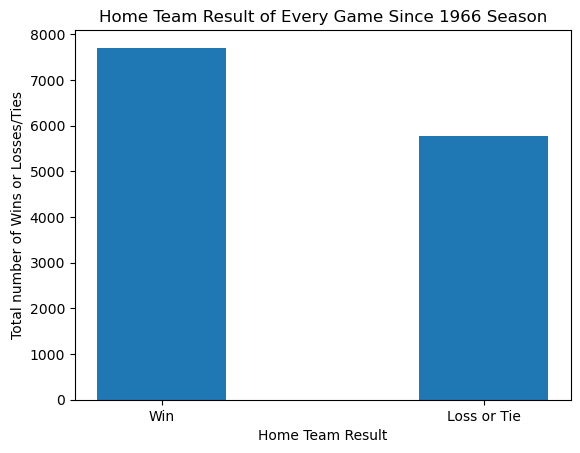

In [33]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()



In [34]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13482 entries, 0 to 13593
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13482 non-null  object 
 1   schedule_season       13482 non-null  int64  
 2   schedule_week         13482 non-null  object 
 3   schedule_playoff      13482 non-null  bool   
 4   team_home             13482 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13482 non-null  object 
 8   home_result           13482 non-null  object 
 9   stadium_name          13482 non-null  object 
 10  stadium_neutral       13482 non-null  bool   
 11  weather_temperature   12255 non-null  float64
 12  weather_wind_mph      12255 non-null  float64
 13  weather_humidity      8448 non-null   float64
 14  weather_detail        2919 non-null   object 
 15  stadium_location      13

In [35]:
playoff_df = data_df.sort_values("schedule_playoff", ascending=False)
playoff_df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
8932,1/8/2006,2005,Wildcard,True,New York Giants,0.0,23.0,Carolina Panthers,Loss or Tie,Giants Stadium,...,NaN,NaN,NaN,"East Rutherford, NJ",outdoor,cold,NaN,NaN,40.812222,-74.076944
6085,1/7/1995,1994,Division,True,San Francisco 49ers,44.0,15.0,Chicago Bears,Win,Candlestick Park,...,NaN,NaN,NaN,"San Francisco, CA",outdoor,moderate,NaN,NaN,37.713611,-122.386111
1290,12/24/1972,1972,Division,True,Miami Dolphins,20.0,14.0,Cleveland Browns,Win,Orange Bowl,...,7.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
1291,12/24/1972,1972,Division,True,Washington Redskins,16.0,3.0,Green Bay Packers,Win,RFK Memorial Stadium,...,6.0,98.0,NaN,"Washington, DC",outdoor,moderate,NaN,NaN,38.913300,-76.970000
1292,12/31/1972,1972,Conference,True,Pittsburgh Steelers,17.0,21.0,Miami Dolphins,Loss or Tie,Three Rivers Stadium,...,16.0,65.0,NaN,"Pittsburgh, PA",outdoor,cold,NaN,NaN,40.446667,-80.012778


In [36]:
playoff_df = playoff_df.reset_index(drop=True)
playoff_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
0,1/8/2006,2005,Wildcard,True,New York Giants,0.0,23.0,Carolina Panthers,Loss or Tie,Giants Stadium,...,NaN,NaN,NaN,"East Rutherford, NJ",outdoor,cold,NaN,NaN,40.812222,-74.076944
1,1/7/1995,1994,Division,True,San Francisco 49ers,44.0,15.0,Chicago Bears,Win,Candlestick Park,...,NaN,NaN,NaN,"San Francisco, CA",outdoor,moderate,NaN,NaN,37.713611,-122.386111
2,12/24/1972,1972,Division,True,Miami Dolphins,20.0,14.0,Cleveland Browns,Win,Orange Bowl,...,7.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
3,12/24/1972,1972,Division,True,Washington Redskins,16.0,3.0,Green Bay Packers,Win,RFK Memorial Stadium,...,6.0,98.0,NaN,"Washington, DC",outdoor,moderate,NaN,NaN,38.913300,-76.970000
4,12/31/1972,1972,Conference,True,Pittsburgh Steelers,17.0,21.0,Miami Dolphins,Loss or Tie,Three Rivers Stadium,...,16.0,65.0,NaN,"Pittsburgh, PA",outdoor,cold,NaN,NaN,40.446667,-80.012778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13477,11/6/1988,1988,10,False,Washington Redskins,27.0,24.0,New Orleans Saints,Win,RFK Memorial Stadium,...,17.0,78.0,NaN,"Washington, DC",outdoor,moderate,NaN,NaN,38.913300,-76.970000
13478,11/7/1988,1988,10,False,Houston Oilers,24.0,17.0,Cleveland Browns,Win,Houston Astrodome,...,0.0,NaN,indoor,"Houston, TX",indoor,indoor,NaN,NaN,NaN,NaN
13479,11/13/1988,1988,11,False,Atlanta Falcons,7.0,10.0,San Diego Chargers,Loss or Tie,Atlanta-Fulton County Stadium,...,9.0,75.0,NaN,"Atlanta, GA",outdoor,warm,NaN,NaN,NaN,NaN
13480,11/13/1988,1988,11,False,Dallas Cowboys,3.0,43.0,Minnesota Vikings,Loss or Tie,Texas Stadium,...,12.0,52.0,NaN,"Irving, TX",outdoor,moderate,NaN,NaN,32.840000,-96.911000


In [39]:
only_playoff_df = playoff_df.loc[playoff_df["schedule_playoff"] == True,:]
print(only_playoff_df)

    schedule_date  schedule_season schedule_week  schedule_playoff  \
0        1/8/2006             2005      Wildcard              True   
1        1/7/1995             1994      Division              True   
2      12/24/1972             1972      Division              True   
3      12/24/1972             1972      Division              True   
4      12/31/1972             1972    Conference              True   
..            ...              ...           ...               ...   
499     1/20/2019             2018    Conference              True   
500     1/13/2019             2018      Division              True   
501    12/23/1979             1979      Wildcard              True   
502      1/2/1999             1998      Wildcard              True   
503     1/15/2011             2010      Division              True   

               team_home  score_home  score_away             team_away  \
0        New York Giants         0.0        23.0     Carolina Panthers   
1    San Fr

In [65]:
data_df = data_df.groupby("home_result")["stadium_type"].value_counts()
data_df

home_result  stadium_type
Loss or Tie  outdoor         4486
             indoor           950
             retractable      330
Win          outdoor         6172
             indoor          1149
             retractable      377
Name: count, dtype: int64

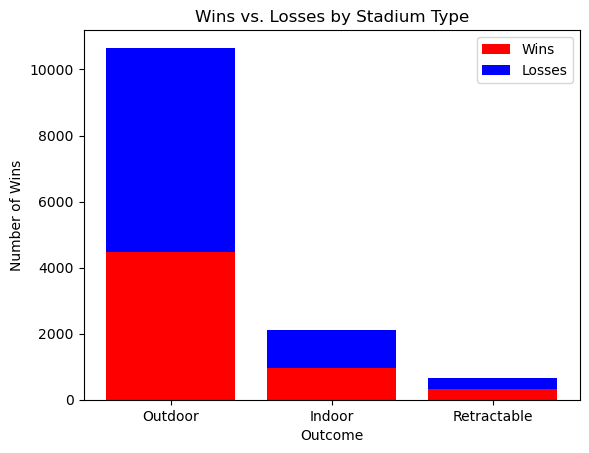

In [86]:
# create data
x = ['Outdoor', 'Indoor', 'Retractable',]
y1 = [4486, 950, 330]
y2 = [6172, 1149, 337]
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Wins vs. Losses by Stadium Type")
plt.xlabel("Outcome")
plt.ylabel("Number of Wins")
plt.legend(["Wins","Losses"])
plt.show()

In [54]:
only_playoff_df = data_df.groupby("home_result")["schedule_playoff"].value_counts()
only_playoff_df

home_result  schedule_playoff
Loss or Tie  False               5610
             True                 167
Win          False               7368
             True                 337
Name: count, dtype: int64

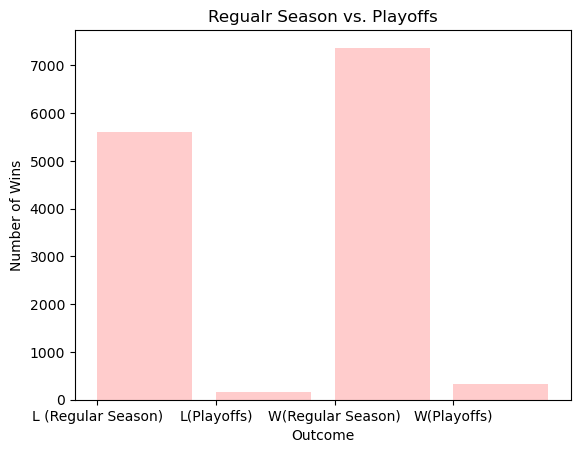

In [59]:
results = [5610, 167, 7368, 337]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.2, align="edge")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["L (Regular Season)", "L(Playoffs)", "W(Regular Season)", "W(Playoffs)"])
plt.title("Regualr Season vs. Playoffs")
plt.xlabel("Outcome")
plt.ylabel("Number of Wins")
plt.show()

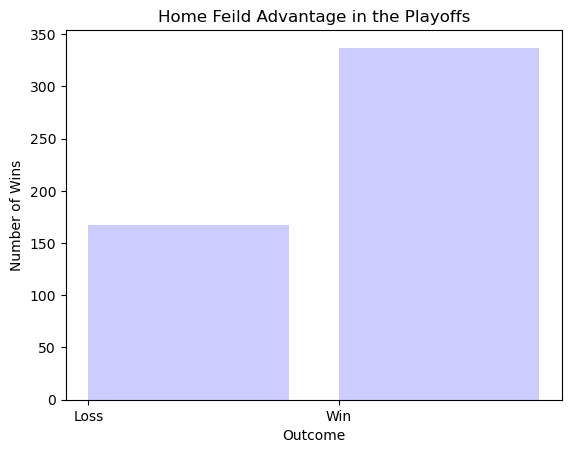

In [62]:
results = [167, 337]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='b', alpha=0.2, align="edge")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Loss", "Win"])
plt.title("Home Feild Advantage in the Playoffs")
plt.xlabel("Outcome")
plt.ylabel("Number of Wins")
plt.show()

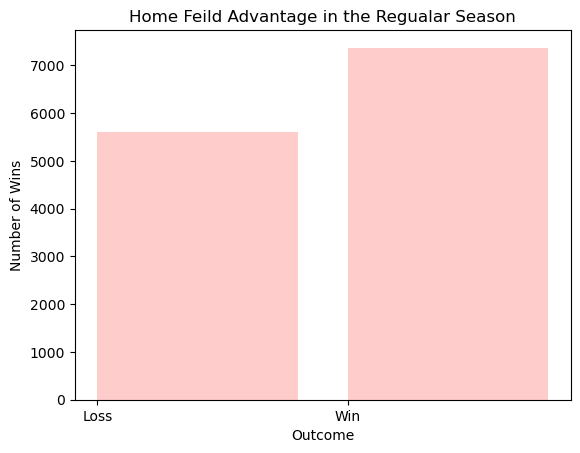

In [63]:
results = [5610, 7368]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.2, align="edge")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Loss", "Win"])
plt.title("Home Feild Advantage in the Regualar Season")
plt.xlabel("Outcome")
plt.ylabel("Number of Wins")
plt.show()

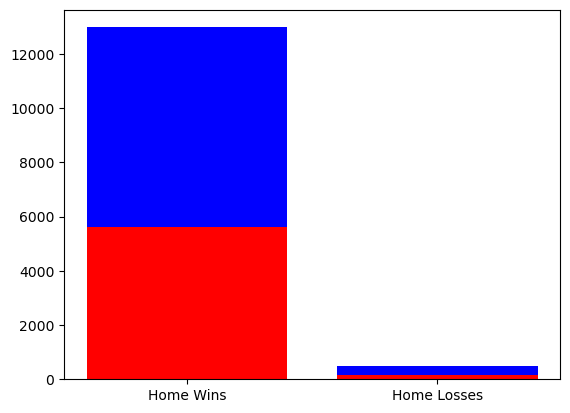

In [80]:
# create data
x = ['Home Wins','Home Losses']
y1 = [5610, 167]
y2 = [7368, 337]

    
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

only_playoff_df = only_playoff_df.sort_values("home_result", ascending=False)
only_playoff_df.head()

In [49]:
playoffs_summary = only_playoff_df.reset_index(drop=True)
playoffs_summary.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
0,1/15/2011,2010,Division,True,Pittsburgh Steelers,31.0,24.0,Baltimore Ravens,Win,Heinz Field,...,NaN,NaN,NaN,"Pittsburgh, PA",outdoor,cold,"65,500",Grass,40.446667,-80.015833
1,1/15/2012,2011,Division,True,Baltimore Ravens,20.0,13.0,Houston Texans,Win,M&T Bank Stadium,...,NaN,NaN,NaN,"Baltimore, MD",outdoor,moderate,"71,008",FieldTurf,39.278056,-76.622778
2,1/2/1982,1981,Division,True,Dallas Cowboys,38.0,0.0,Tampa Bay Buccaneers,Win,Texas Stadium,...,NaN,NaN,NaN,"Irving, TX",outdoor,moderate,NaN,NaN,32.840000,-96.911000
3,12/26/1977,1977,Division,True,Dallas Cowboys,37.0,7.0,Chicago Bears,Win,Texas Stadium,...,8.0,35.0,NaN,"Irving, TX",outdoor,moderate,NaN,NaN,32.840000,-96.911000
4,12/24/1977,1977,Division,True,Denver Broncos,34.0,21.0,Pittsburgh Steelers,Win,Mile High Stadium,...,16.0,31.0,NaN,"Denver, CO",outdoor,cold,NaN,NaN,39.746111,-105.021667
